In [2]:
import pandas as pd
from scipy.stats import levene


pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows

# Import Dataset

In [3]:
# Import df_CS.csv as df
df = pd.read_csv('df_CS.csv')

# Display the first few rows of the DataFrame
df.head()

,record_id,covid_group,interventiongroup,mmrc_score,pcfs_score,subject_dob,subject_gender,subject_ethnicity,health_smoking,health_history,health_medications,covid_onset,covid_infections,covid_vaccinations,covid_supplemento2,covid_hospitalization,covid_icu,covid_mechanicalvent,covid_intubation,covid_apnea,covid_apnea_ahi,covid_apnea_rdi,covid_apnea_cpap,covid_hallucinations,covid_taste,covid_smell,covid_hearing,covid_tinnitus,covid_vision,covid_throat,covid_choking,covid_sweating,covid_sneezing,covid_coughing,covid_voice,covid_fevers,covid_hair,covid_skin,covid_digestion,covid_chestpain,covid_palpitations,covid_restlessleg,covid_other,covid_primary,data_age,cpet_hr_restingsit,cpet_sbp_sitting,cpet_dbp_sitting,cpet_hr_restingstand,cpet_sbp_standing,cpet_dbp_standing,cpet_spo2_pre,data_kilograms,data_centimeters,data_bmi,data_gender,fmd_diameter_baseline,fmd_diameter_maximum,fmd_percent,fmd_shear_baseline,fmd_shear_maximum,fmd_shear_auc,fmd_shear_areatomaximum,fmd_velocity_baseline,fmd_velocity_maximum,fmd_normalized,imt_mip_1_pre,imt_mip_1_post,imt_mip_2_pre,imt_mip_2_post,imt_mip_3_pre,imt_mip_3_post,imt_fit_1_pre,imt_fit_1_post,imt_fit_2_pre,imt_fit_2_post,imt_fit_3_pre,imt_fit_3_post,imt_smip_1_pre,imt_slopesmip_1_pre,imt_id_1_pre,imt_smip_1_post,imt_slopesmip_1_post,imt_id_1_post,imt_smip_2_pre,imt_slopesmip_2_pre,imt_id_2_pre,imt_smip_2_post,imt_slopesmip_2_post,imt_id_2_post,imt_smip_3_pre,imt_slopesmip_3_pre,imt_id_3_pre,imt_smip_3_post,imt_slopesmip_3_post,imt_id_3_post,imt_pif_1_pre,imt_pif_1_post,imt_pif_2_pre,imt_pif_2_post,imt_pif_3_pre,imt_pif_3_post,imt_sindex_1_pre,imt_sindex_1_post,imt_sindex_2_pre,imt_sindex_2_post,imt_sindex_3_pre,imt_sindex_3_post,imt_volume_1_pre,imt_volume_1_post,imt_volume_2_pre,imt_volume_2_post,imt_volume_3_pre,imt_volume_3_post,imt_mep_1,imt_mep_2,imt_mep_3,imt_meppower_1,imt_meppower_2,imt_meppower_3,imt_mepfit_1,imt_mepfit_2,imt_mepfit_3,cpet_sbp_peak,cpet_dbp_peak,cpet_borg,cpet_spo2_post,cpet_hr_cooldown1,cpet_hr_cooldown2,cpet_vo2peak_absolute,cpet_vo2peak_relative,cpet_athreshold_vem_abs,cpet_athreshold_vem_rel,cpet_athreshold_vslope_abs,cpet_athreshold_vslope_rel,cpet_oues,cpet_hr_peak,cpet_ve,cpet_vevo2,cpet_o2pulse,cpet_rer,cpet_rr_peak,cpet_vt_peak,cpet_petco2_peak,cpet_petco2_at_vslope,cpet_petco2_at_vem,cpet_vevco2_peak,cpet_vevco2_at_vslope,cpet_vevco2_at_vem,cpet_vevco2slope_at_vslope,cpet_vevco2slope_at_vem,cpet_vevco2slope_peak,cpet_chronindex,cpet_hrr1,cpet_hrr2,hrv_sdnn,hrv_heartrate,hrv_rmssd,hrv_lfhf,woods_concentration,woods_decisions,woods_confusion,woods_memory,woods_words,woods_takethingsin,woods_processingspeed,woods_thoughtsmixed,woods_muzzy,fss_motivation,fss_exercise,fss_easily,fss_functioning,fss_problems,fss_sustained,fss_duties,fss_disabling,fss_social,dsq_heavy_freq,dsq_nextday_freq,dsq_mentallytired_freq,dsq_minexercise_freq,dsq_drained_freq,dsq_heavy_severity,dsq_nextday_severity,dsq_mentallytired_severity,dsq_minexercise_severity,dsq_drained_severity,psqi_sleepstart,psqi_latency,psqi_sleepend,psqi_hours,psqi_latency30,psqi_wake,psqi_bathroom,psqi_breathe,psqi_snore,psqi_cold,psqi_hot,psqi_dreams,psqi_pain,psqi_other,psqi_medicine,psqi_sleepy,psqi_enthusiasm,psqi_quality,ndi_intensity,ndi_personalcare,ndi_lifting,ndi_work,ndi_headaches,ndi_concentration,ndi_sleeping,ndi_driving,ndi_reading,ndi_recreation,odi_intensity,odi_personalcare,odi_lifting,odi_walking,odi_sitting,odi_standing,odi_sleeping,odi_sex,odi_social,odi_traveling,vas_backpainworst,vas_backpainbest,vas_backpaincurrent,vas_neckpainworst,vas_neckpainbest,vas_neckpaincurrent,vas_myalgiaworst,vas_myalgiabest,vas_myalgiacurrent,vas_dizzyworst,vas_dizzybest,vas_dizzycurrent,vas_fatigueworst,vas_fatiguebest,vas_fatiguecurrent,gad_anxious,gad_worrying,phq_hopeless,phq_anhedonia,ptsd_nightmares,ptsd_intrusive,ptsd_startled,ptsd_detached,ptsd_guilty,sfpa_vigorous,sfpa_moderate,sfpa_lifting,sfpa_stairs2,sfpa_stairs1,sfpa_stooping,sfpa_walkingmile,sfpa_walkingblocks2,sfpa_walkingblocks1,sfpa_bathingdre

# Outcome Measures

In [19]:
outcome_measures = {

# Descriptives
'data_age': {'name': 'Age', 'unit': 'years'}, 
 
# Vascular measures
'fmd_percent': {'name': 'Flow-Mediated Dilation', 'unit': '%'},
'fmd_diameter_baseline': {'name': 'Baseline Diameter', 'unit': 'mm'},
'fmd_diameter_maximum': {'name': 'Maximum Diameter', 'unit': 'mm'},
'fmd_shear_baseline': {'name': 'Baseline Shear', 'unit': 'dynes/cm²'},  # adjust units if needed
'fmd_shear_maximum': {'name': 'Maximum Shear', 'unit': 'dynes/cm²'},   # adjust units if needed
'fmd_velocity_baseline': {'name': 'Baseline Velocity', 'unit': 'cm/s'}, # or m/s depending on your data
'fmd_velocity_maximum': {'name': 'Maximum Velocity', 'unit': 'cm/s'},
'fmd_shear_areatomaximum': {'name': 'Shear Area to Maximum', 'unit': 'dynes·s/cm²'},  # adjust
'fmd_shear_auc': {'name': 'Shear AUC', 'unit': 'dynes·s/cm²'},  # adjust

# CPET Measures
'cpet_vo2peak_relative': {'name': 'VO2 Peak', 'unit': 'mL/kg/min'},
'cpet_vo2peak_absolute': {'name': 'VO2 Peak (Absolute)', 'unit': 'L/min'},
'cpet_athreshold_vslope_rel': {'name': 'Anaerobic Threshold (%VO2peak)', 'unit': '%'},
'cpet_athreshold_vslope_abs': {'name': 'Anaerobic Threshold (VO2)', 'unit': 'L/min'},
'cpet_rer': {'name': 'Peak RER', 'unit': ''},
'cpet_petco2_peak': {'name': 'PetCO2 Peak', 'unit': 'mmHg'},
'cpet_petco2_at_vslope': {'name': 'PetCO2 AT', 'unit': 'mmHg'},
'cpet_o2pulse': {'name': 'Peak O2 Pulse', 'unit': 'mL/beat'},
'cpet_vt_peak': {'name': 'Peak Tidal Volume', 'unit': 'L'},
'cpet_rr_peak': {'name': 'Peak Respiratory Rate', 'unit': 'breaths/min'},
'cpet_hr_peak': {'name': 'Peak Heart Rate', 'unit': 'bpm'},
'cpet_vevco2_peak': {'name': 'Peak VE/VCO2', 'unit': ''},
'cpet_vevco2slope_peak': {'name': 'Peak VE/VCO2 Slope', 'unit': ''},
'cpet_oues': {'name': 'OUES', 'unit': 'L/min'},  # or unitless if you prefer
'cpet_hrr1': {'name': 'HRR 1', 'unit': 'BPM'},
'cpet_hrr2': {'name': 'HRR 2', 'unit': 'BPM'},
'cpet_chronindex': {'name': 'Chronotropic Index (CI)', 'unit': ''},

# Respiratory measures (treating pre and post separately)
'mip_pre_max': {'name': 'MIP Max (Pre-Activity)', 'unit': 'cmH2O'},
'mip_post_max': {'name': 'MIP Max (Post-Activity)', 'unit': 'cmH2O'},
'mip_max_fatigue': {'name': 'MIP Max Fatigue', 'unit': 'cmH2O'},
'mip_max_fatigue_percent': {'name': 'MIP Max Fatigue (%)', 'unit': '%'},
'smip_pre_max': {'name': 'SMIP Max (Pre-Activity)', 'unit': 'cmH2O'},
'smip_post_max': {'name': 'SMIP Max (Post-Activity)', 'unit': 'cmH2O'},
'smip_max_fatigue': {'name': 'SMIP Max Fatigue', 'unit': 'cmH2O'},
'smip_max_fatigue_percent': {'name': 'SMIP Max Fatigue (%)', 'unit': '%'},
'pif_pre_max': {'name': 'PIF Max (Pre-Activity)', 'unit': 'cmH2O'},
'pif_post_max': {'name': 'PIF Max (Post-Activity)', 'unit': 'cmH2O'},
'pif_max_fatigue': {'name': 'PIF Max Fatigue', 'unit': 'cmH2O'},
'pif_max_fatigue_percent': {'name': 'PIF Max Fatigue (%)', 'unit': '%'},
'sindex_pre_max': {'name': 'SIndex Max (Pre-Activity)', 'unit': 'cmH2O'},
'sindex_post_max': {'name': 'SIndex Max (Post-Activity)', 'unit': 'cmH2O'},
'sindex_max_fatigue': {'name': 'SIndex Max Fatigue', 'unit': 'cmH2O'},
'sindex_max_fatigue_percent': {'name': 'SIndex Max Fatigue (%)', 'unit': '%'},
'fit_pre_max': {'name': 'FIT Max (Pre-Activity)', 'unit': 'cmH2O'},
'fit_post_max': {'name': 'FIT Max (Post-Activity)', 'unit': 'cmH2O'},
'volume_pre_max': {'name': 'Volume Max (Pre-Activity)', 'unit': 'L'},
'volume_post_max': {'name': 'Volume Max (Post-Activity)', 'unit': 'L'},


# Autonomic Measures
'hrv_sdnn': {'name': 'HRV SDNN', 'unit': 'ms'},
'hrv_rmssd': {'name': 'HRV RMSSD', 'unit': 'ms'},
'hrv_heartrate': {'name': 'Heart Rate', 'unit': 'bpm'},
'hrv_lf': {'name': 'HRV LF Power', 'unit': 'ms²'},
'hrv_hf': {'name': 'HRV HF Power', 'unit': 'ms²'},
'hrv_lfhf': {'name': 'HRV LF/HF Ratio', 'unit': ''}

}

# Descriptive Statistics

## Age and Gender

In [9]:
# Print the mean age grouped by covid_group
print(df.groupby('covid_group')['data_age'].mean())

# Print the mean gender grouped by covid_group
print(df.groupby('covid_group')['data_gender'].mean())

gender_counts = (
    df.groupby('covid_group')['subject_female']
      .value_counts()
      .unstack(fill_value=0)
)

print(gender_counts)


covid_group
0.0    45.3
1.0    43.9
Name: data_age, dtype: float64
covid_group
0.0    0.375000
1.0    0.333333
Name: data_gender, dtype: float64
subject_female  0.0  1.0
covid_group             
0.0               4    6
1.0               7   13


## Outcome Measures

In [27]:
# Print the mean and standard deviation for each outcome measure and group by covid_group
for measure, details in outcome_measures.items():
    mean_value = df.groupby('covid_group')[measure].mean()
    std_value = df.groupby('covid_group')[measure].std()
    print(f"{details['name']} ({details['unit']}):")
    print("Mean:\n", mean_value)
    print("Standard Deviation:\n", std_value)
    print("\n")



Age (years):
Mean:
 covid_group
0.0    39.857143
1.0    45.739130
Name: data_age, dtype: float64
Standard Deviation:
 covid_group
0.0    11.393398
1.0    18.367999
Name: data_age, dtype: float64


Flow-Mediated Dilation (%):
Mean:
 covid_group
0.0    8.211429
1.0    5.223478
Name: fmd_percent, dtype: float64
Standard Deviation:
 covid_group
0.0    1.131480
1.0    1.279473
Name: fmd_percent, dtype: float64


Baseline Diameter (mm):
Mean:
 covid_group
0.0    4.105714
1.0    3.823043
Name: fmd_diameter_baseline, dtype: float64
Standard Deviation:
 covid_group
0.0    1.019006
1.0    0.839389
Name: fmd_diameter_baseline, dtype: float64


Maximum Diameter (mm):
Mean:
 covid_group
0.0    4.436714
1.0    4.021826
Name: fmd_diameter_maximum, dtype: float64
Standard Deviation:
 covid_group
0.0    1.06980
1.0    0.87634
Name: fmd_diameter_maximum, dtype: float64


Baseline Shear (dynes/cm²):
Mean:
 covid_group
0.0    116.262857
1.0    384.143478
Name: fmd_shear_baseline, dtype: float64
Standard D

In [20]:
# Run an Independent T-Test for each outcome measure between covid_group 0 and 1
from scipy import stats
for measure, details in outcome_measures.items():
    group0 = df[df['covid_group'] == 0][measure].dropna()
    group1 = df[df['covid_group'] == 1][measure].dropna()
    t_stat, p_value = stats.ttest_ind(group0, group1)
    print(f"{details['name']} ({details['unit']}):")
    print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
    print("\n")

Age (years):
T-Statistic: -0.7961855546760958, P-Value: 0.4326231266059095


Flow-Mediated Dilation (%):
T-Statistic: 5.540906696488662, P-Value: 6.338102655788402e-06


Baseline Diameter (mm):
T-Statistic: 0.7433167595354182, P-Value: 0.4634817242021587


Maximum Diameter (mm):
T-Statistic: 1.0433235365607112, P-Value: 0.30572312224507636


Baseline Shear (dynes/cm²):
T-Statistic: -1.431657017462391, P-Value: 0.16331066944002567


Maximum Shear (dynes/cm²):
T-Statistic: -1.2804630407469022, P-Value: 0.2108884329317371


Baseline Velocity (cm/s):
T-Statistic: -1.384827760737851, P-Value: 0.17704137199178668


Maximum Velocity (cm/s):
T-Statistic: -1.3962502464569184, P-Value: 0.1736112220300386


Shear Area to Maximum (dynes·s/cm²):
T-Statistic: -0.8826070956636356, P-Value: 0.3849635319126975


Shear AUC (dynes·s/cm²):
T-Statistic: -1.4683477454880673, P-Value: 0.1531552060993072


VO2 Peak (mL/kg/min):
T-Statistic: 1.8177627048304978, P-Value: 0.07981612209596257


VO2 Peak (Absolute

# Welch

In [21]:
# Run Welch’s T-Test for each outcome measure between covid_group 0 and 1
from scipy import stats

for measure, details in outcome_measures.items():
    group0 = df[df['covid_group'] == 0][measure].dropna()
    group1 = df[df['covid_group'] == 1][measure].dropna()

    # Welch’s t-test (unequal variances)
    t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)

    print(f"{details['name']} ({details['unit']}):")
    print(f"Welch's T-Statistic: {t_stat:.3f}, P-Value: {p_value:.4f}")
    print("\n")


Age (years):
Welch's T-Statistic: -1.021, P-Value: 0.3222


Flow-Mediated Dilation (%):
Welch's T-Statistic: 5.928, P-Value: 0.0001


Baseline Diameter (mm):
Welch's T-Statistic: 0.668, P-Value: 0.5215


Maximum Diameter (mm):
Welch's T-Statistic: 0.935, P-Value: 0.3753


Baseline Shear (dynes/cm²):
Welch's T-Statistic: -2.596, P-Value: 0.0161


Maximum Shear (dynes/cm²):
Welch's T-Statistic: -1.817, P-Value: 0.0832


Baseline Velocity (cm/s):
Welch's T-Statistic: -2.522, P-Value: 0.0191


Maximum Velocity (cm/s):
Welch's T-Statistic: -2.293, P-Value: 0.0296


Shear Area to Maximum (dynes·s/cm²):
Welch's T-Statistic: -1.063, P-Value: 0.3055


Shear AUC (dynes·s/cm²):
Welch's T-Statistic: -1.898, P-Value: 0.0750


VO2 Peak (mL/kg/min):
Welch's T-Statistic: 2.135, P-Value: 0.0518


VO2 Peak (Absolute) (L/min):
Welch's T-Statistic: 1.812, P-Value: 0.1042


Anaerobic Threshold (%VO2peak) (%):
Welch's T-Statistic: 0.404, P-Value: 0.6936


Anaerobic Threshold (VO2) (L/min):
Welch's T-Statist

# Regression

In [23]:
import statsmodels.formula.api as smf

for measure, details in outcome_measures.items():
    formula = f"{measure} ~ covid_group + data_age + subject_gender"
    model = smf.ols(formula=formula, data=df).fit()

    print(f"{details['name']} ({details['unit']}):")
    print(model.summary().tables[1])  # Print the coefficients table
    print("\n")


Age (years):
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -3.73e-14   1.25e-14     -2.982      0.006    -6.3e-14   -1.16e-14
subject_gender[T.Male]  8.882e-16   8.03e-15      0.111      0.913   -1.56e-14    1.74e-14
covid_group            -1.998e-15   9.23e-15     -0.216      0.830    -2.1e-14     1.7e-14
data_age                   1.0000   2.34e-16   4.28e+15      0.000       1.000       1.000


Flow-Mediated Dilation (%):
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.7298      0.757     10.207      0.000       6.173       9.286
subject_gender[T.Male]    -0.0775      0.486     -0.159      0.875      -1.077       0.922
covid_group               -3.0702      0.559   

# Random Ideas

## Is chest pain associated with brain fog???

In [ ]:
import statsmodels.formula.api as smf

df_covid = df[df['covid_group'] == 1]
formula = f"hrv_sdnn ~ data_age + subject_gender + cpet_dbp_sitting"
model = smf.ols(formula=formula, data=df_covid).fit()

print(model.summary().tables[1])  # Print the coefficients table


                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 28.5227     14.254      2.001      0.060      -1.311      58.357
subject_gender[T.Male]    -4.2318      4.404     -0.961      0.349     -13.449       4.985
data_age                  -0.0436      0.112     -0.391      0.700      -0.277       0.190
cpet_dbp_sitting          -0.0909      0.159     -0.571      0.575      -0.424       0.242


## VO2 Peak controlling for kilograms

In [26]:
# Run a regression analysis for VO2 Peak controlling for kilograms, age, sex, and group
formula = 'cpet_vo2peak_relative ~ covid_group + data_age + subject_female + data_kilograms'
model = smf.ols(formula=formula, data=df).fit()
print(model.summary().tables[1])  # Print the coefficients table for VO2 Peak
print("\n")

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         63.1420      9.052      6.975      0.000      44.499      81.785
covid_group       -5.0323      3.162     -1.592      0.124     -11.544       1.480
data_age          -0.2561      0.080     -3.200      0.004      -0.421      -0.091
subject_female    -9.6956      3.297     -2.941      0.007     -16.486      -2.906
data_kilograms    -0.2179      0.085     -2.574      0.016      -0.392      -0.044




## T-Tests

In [5]:
# Run an independent T-Test for cpet_vevco2slope_peak between covid_group 0 and 1
from scipy import stats

variable = 'cpet_athreshold_vslope_rel'  # Change this to test different variables

group0 = df[df['covid_group'] == 0][variable].dropna()
group1 = df[df['covid_group'] == 1][variable].dropna()
t_stat, p_value = stats.ttest_ind(group0, group1)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Run a Mann Whitney Test for cpet_o2pulse between covid_group 0 and 1
u_stat, p_value = stats.mannwhitneyu(group0, group1, alternative='two-sided')
print(f"U-Statistic: {u_stat}, P-Value: {p_value}")

# Run a Welch's T-Test for cpet_o2pulse between covid_group 0 and 1
t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)
print(f"Welch's T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 1.5645375902933856, P-Value: 0.13196302540385751
U-Statistic: 95.0, P-Value: 0.10740463633025366
Welch's T-Statistic: 1.5357738391255864, P-Value: 0.1441117098920334


LeveneResult(statistic=4.277715890190142, pvalue=0.047964400604774075)


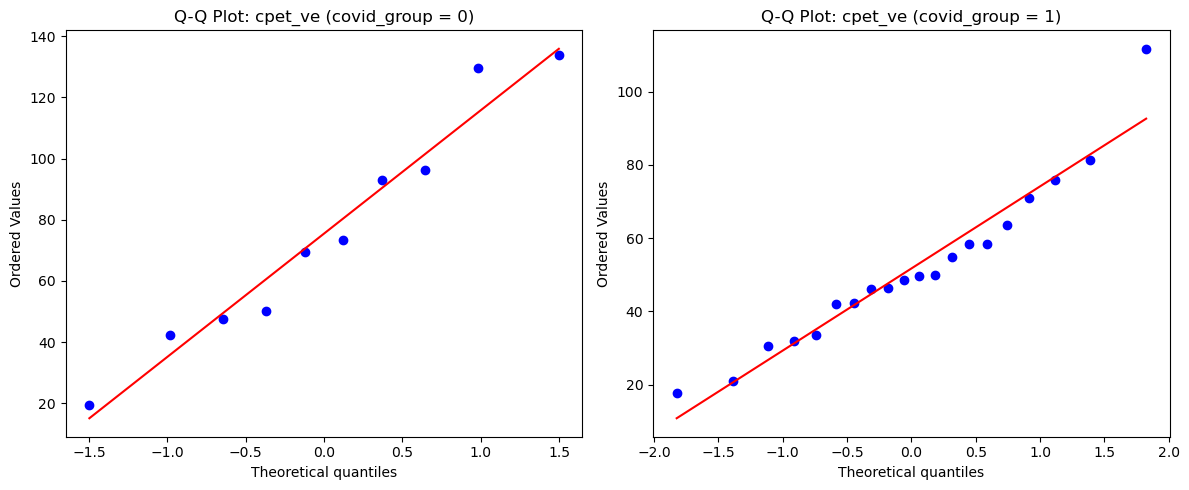

In [15]:
import matplotlib.pyplot as plt
import scipy.stats as stats

variable = 'cpet_ve'
group0 = df[df['covid_group'] == 0][variable].dropna()
group1 = df[df['covid_group'] == 1][variable].dropna()

lev = levene(group0, group1)
print(lev)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(group0, dist="norm", plot=plt)
plt.title("Q-Q Plot: cpet_ve (covid_group = 0)")

plt.subplot(1, 2, 2)
stats.probplot(group1, dist="norm", plot=plt)
plt.title("Q-Q Plot: cpet_ve (covid_group = 1)")

plt.tight_layout()
plt.show()

In [7]:
# Print mean cpet_athreshold_vslope_rel for each covid_group
print(df.groupby('covid_group')['cpet_athreshold_vslope_abs'].mean())

covid_group
0.0    1.681667
1.0    1.009733
Name: cpet_athreshold_vslope_abs, dtype: float64


# Group Comparisons

In [4]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
import numpy as np

# Define your variable lists
descriptives_continuous = ['data_age', 'mip_pre_max', 'cpet_vo2peak_absolute', 'cpet_vo2peak_relative', 'data_bmi']
descriptives_categorical = ['subject_female']

print("=== CONTINUOUS VARIABLES ===")
print("=" * 50)

# Loop through continuous variables
for var in descriptives_continuous:
    print(f"\n--- {var} ---")
    
    # Calculate mean and standard deviation by group
    grouped_stats = df.groupby('interventiongroup')[var].agg(['mean', 'std'])
    
    # Print statistics
    print("Group 0 (Placebo):")
    print(f"  Mean: {grouped_stats.loc[0, 'mean']:.2f}")
    print(f"  Std:  {grouped_stats.loc[0, 'std']:.2f}")
    
    print("Group 1 (Intervention):")
    print(f"  Mean: {grouped_stats.loc[1, 'mean']:.2f}")
    print(f"  Std:  {grouped_stats.loc[1, 'std']:.2f}")
    
    # Perform t-test
    group0_data = df[df['interventiongroup'] == 0][var].dropna()
    group1_data = df[df['interventiongroup'] == 1][var].dropna()
    
    t_stat, p_value = ttest_ind(group0_data, group1_data)
    
    print(f"T-test: t = {t_stat:.3f}, p = {p_value:.3f}")

print("\n" + "=" * 50)
print("=== CATEGORICAL VARIABLES ===")
print("=" * 50)

# Loop through categorical variables
for var in descriptives_categorical:
    print(f"\n--- {var} ---")
    
    # Create contingency table
    contingency_table = pd.crosstab(df['interventiongroup'], df[var])
    
    # Calculate percentages
    percentages = pd.crosstab(df['interventiongroup'], df[var], normalize='index') * 100
    
    # Print counts and percentages
    for group in [0, 1]:
        group_name = "Placebo" if group == 0 else "Intervention"
        print(f"Group {group} ({group_name}):")
        
        for category in contingency_table.columns:
            count = contingency_table.loc[group, category]
            percentage = percentages.loc[group, category]
            category_name = "Male" if category == 0 else "Female" if var == 'subject_female' else category
            print(f"  {category_name}: {count} ({percentage:.1f}%)")
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-square test: χ² = {chi2:.3f}, p = {p_value:.3f}")

=== CONTINUOUS VARIABLES ===

--- data_age ---
Group 0 (Placebo):
  Mean: 50.10
  Std:  21.23
Group 1 (Intervention):
  Mean: 37.70
  Std:  9.23
T-test: t = 1.694, p = 0.107

--- mip_pre_max ---
Group 0 (Placebo):
  Mean: 43.60
  Std:  15.95
Group 1 (Intervention):
  Mean: 52.20
  Std:  14.28
T-test: t = -1.270, p = 0.220

--- cpet_vo2peak_absolute ---
Group 0 (Placebo):
  Mean: 1.61
  Std:  0.70
Group 1 (Intervention):
  Mean: 1.83
  Std:  0.40
T-test: t = -0.839, p = 0.412

--- cpet_vo2peak_relative ---
Group 0 (Placebo):
  Mean: 19.79
  Std:  6.87
Group 1 (Intervention):
  Mean: 24.23
  Std:  7.27
T-test: t = -1.405, p = 0.177

--- data_bmi ---
Group 0 (Placebo):
  Mean: 26.95
  Std:  5.94
Group 1 (Intervention):
  Mean: 29.44
  Std:  7.24
T-test: t = -0.840, p = 0.412

=== CATEGORICAL VARIABLES ===

--- subject_female ---
Group 0 (Placebo):
  Male: 4 (40.0%)
  Female: 6 (60.0%)
Group 1 (Intervention):
  Male: 3 (30.0%)
  Female: 7 (70.0%)
Chi-square test: χ² = 0.000, p = 1.000


In [7]:
categories_order = [
    'Hispanic or Latino',
    'American Indian/Alaskan Native',
    'Asian',
    'Native Hawaiian or Pacific Islander',
    'Black or African American',
    'White',
    'More than One Race',
    'Unknown'
]

# Create frequency table for ethnicity by intervention group
ethnicity_table = (
    df.pivot_table(
        index='subject_ethnicity_categorized',
        columns='interventiongroup',
        aggfunc='size',
        fill_value=0
    )
    .reindex(categories_order)
    .fillna(0)
    .astype(int)
)

# Add column names for clarity
ethnicity_table.columns = ['Placebo (0)', 'Intervention (1)']

print("Ethnicity Distribution by Intervention Group")
print("=" * 50)
print(ethnicity_table)
print("\n")

# If you want percentages as well:
print("Ethnicity Distribution by Intervention Group (Percentages)")
print("=" * 60)
ethnicity_percentages = (ethnicity_table.div(ethnicity_table.sum()) * 100).round(1)
print(ethnicity_percentages)
print("\n")

# For a more detailed breakdown with both counts and percentages:
print("Detailed Ethnicity Breakdown by Intervention Group")
print("=" * 65)
for group in [0, 1]:
    group_name = "Placebo" if group == 0 else "Intervention"
    print(f"\n{group_name} Group (n={ethnicity_table[group].sum()}):")
    print("-" * 40)
    
    for ethnicity in categories_order:
        count = ethnicity_table.loc[ethnicity, group]
        percentage = (count / ethnicity_table[group].sum() * 100) if ethnicity_table[group].sum() > 0 else 0
        print(f"  {ethnicity}: {count} ({percentage:.1f}%)")

# Chi-square test for ethnicity differences between groups
print("\n" + "=" * 50)
print("Statistical Test")
print("=" * 50)

# Perform chi-square test
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(ethnicity_table)
print(f"Chi-square test for ethnicity distribution:")
print(f"χ² = {chi2:.3f}, p = {p_value:.3f}")
print(f"Degrees of freedom: {dof}")

Ethnicity Distribution by Intervention Group
                                     Placebo (0)  Intervention (1)
subject_ethnicity_categorized                                     
Hispanic or Latino                             1                 4
American Indian/Alaskan Native                 0                 0
Asian                                          1                 1
Native Hawaiian or Pacific Islander            0                 0
Black or African American                      1                 0
White                                          7                 3
More than One Race                             0                 2
Unknown                                        0                 0


Ethnicity Distribution by Intervention Group (Percentages)
                                     Placebo (0)  Intervention (1)
subject_ethnicity_categorized                                     
Hispanic or Latino                          10.0              40.0
American Indian/Alaskan

KeyError: 0

# VE/VCO2

# 7:02pm

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\2585758488.py:56: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',
C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\2585758488.py:56: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',


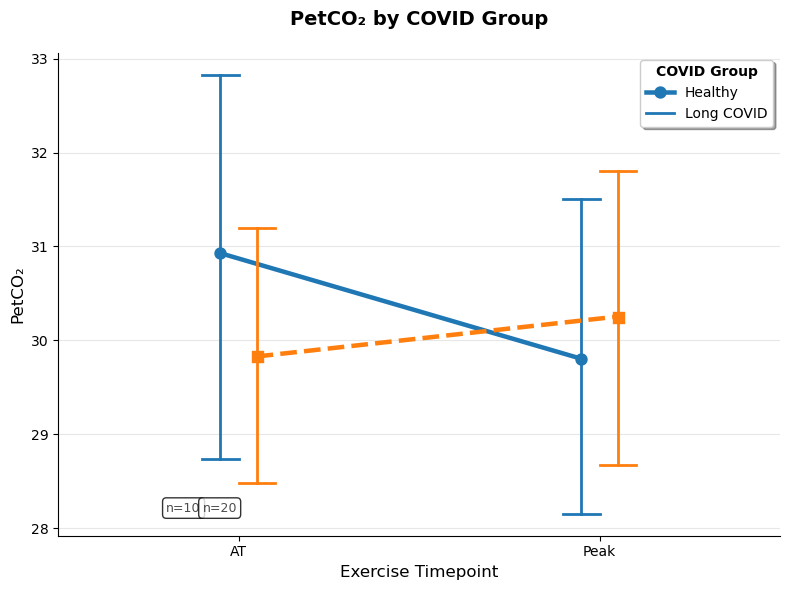


=== PetCO₂ Summary Statistics ===

Healthy Group:
  AT:   30.93 ± 3.42 (n=10)
  Peak: 29.80 ± 2.95 (n=10)
  Change: -1.12 (-3.6%) - decrease

Long COVID Group:
  AT:   29.83 ± 3.33 (n=20)
  Peak: 30.25 ± 3.66 (n=20)
  Change: +0.43 (+1.4%) - increase


C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\2585758488.py:56: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',
C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\2585758488.py:56: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',


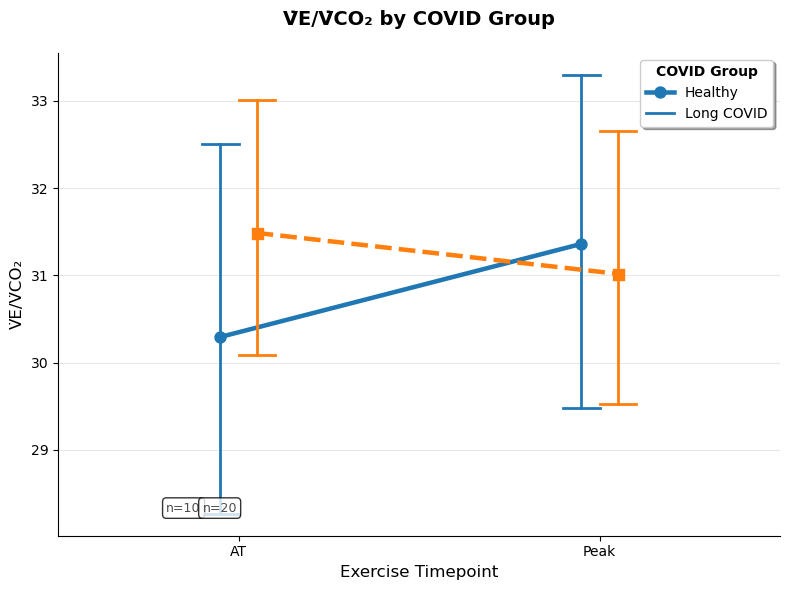


=== V̇E/V̇CO₂ Summary Statistics ===

Healthy Group:
  AT:   30.30 ± 3.69 (n=10)
  Peak: 31.36 ± 3.25 (n=10)
  Change: +1.07 (+3.5%) - increase

Long COVID Group:
  AT:   31.49 ± 3.56 (n=20)
  Peak: 31.02 ± 3.69 (n=20)
  Change: -0.47 (-1.5%) - decrease


C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\2585758488.py:56: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',
C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\2585758488.py:56: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',


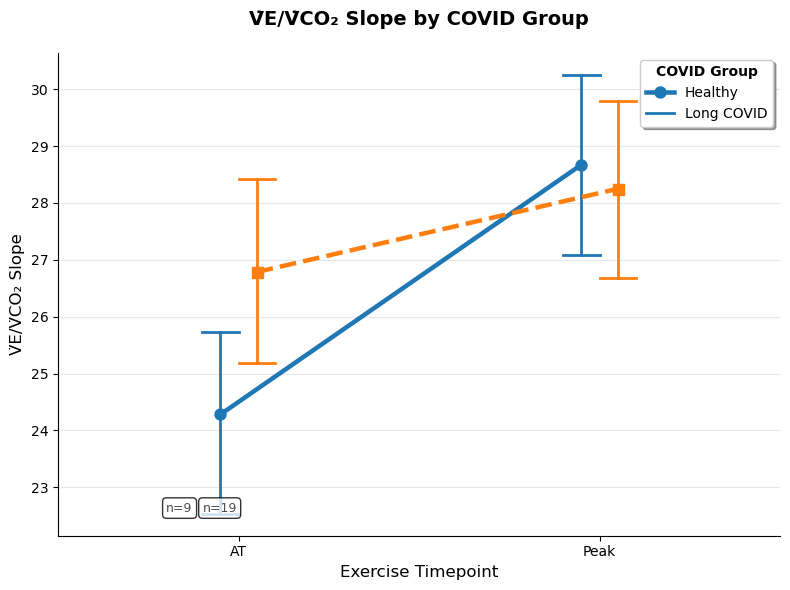


=== V̇E/V̇CO₂ Slope Summary Statistics ===

Healthy Group:
  AT:   24.28 ± 2.77 (n=9)
  Peak: 28.67 ± 2.63 (n=10)
  Change: +4.39 (+18.1%) - increase

Long COVID Group:
  AT:   26.78 ± 3.75 (n=19)
  Peak: 28.25 ± 3.84 (n=20)
  Change: +1.46 (+5.5%) - increase

CHANGE SCORE ANALYSIS


C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\2585758488.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df_change, x='COVID_Group', y='Value', palette=colors)


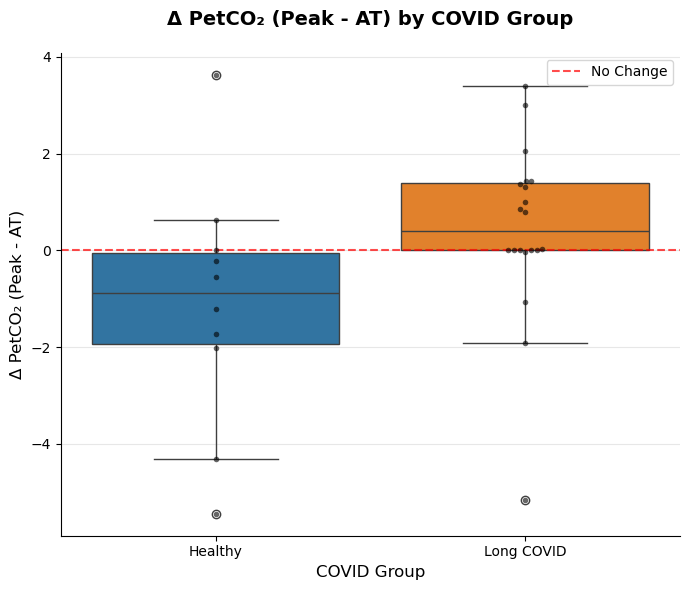


--- Δ PetCO₂ (Peak - AT) ---
Healthy: -1.12 ± 2.54 (n=10)
  Range: [-5.45, 3.63]
Long COVID: 0.43 ± 1.82 (n=20)
  Range: [-5.16, 3.41]


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define your variables
cpet_variables = [
    'cpet_petco2_at_vslope', 'cpet_petco2_peak',
    'cpet_vevco2_at_vslope', 'cpet_vevco2_peak', 
    'cpet_vevco2slope_at_vslope', 'cpet_vevco2slope_peak'
]

# Create a mapping for better variable names
variable_names = {
    'cpet_petco2_at_vslope': 'PetCO₂ at VT',
    'cpet_petco2_peak': 'PetCO₂ at Peak',
    'cpet_vevco2_at_vslope': 'V̇E/V̇CO₂ at VT', 
    'cpet_vevco2_peak': 'V̇E/V̇CO₂ at Peak',
    'cpet_vevco2slope_at_vslope': 'V̇E/V̇CO₂ Slope at VT',
    'cpet_vevco2slope_peak': 'V̇E/V̇CO₂ Slope at Peak'
}

# Reshape data for plotting
plot_data = []

for var in cpet_variables:
    # Skip missing data
    valid_data = df[['covid_group', var]].dropna()
    
    for idx, row in valid_data.iterrows():
        plot_data.append({
            'Subject_ID': idx,  # Use the original index as subject identifier
            'COVID_Group': row['covid_group'],
            'Variable': variable_names[var],
            'Value': row[var],
            'Timepoint': 'AT' if 'at_vslope' in var else 'Peak',
            'Parameter': 'PetCO₂' if 'petco2' in var else 'V̇E/V̇CO₂' if 'vevco2_' in var else 'V̇E/V̇CO₂ Slope'
        })

plot_df = pd.DataFrame(plot_data)

# Create separate plots for each parameter
parameters = ['PetCO₂', 'V̇E/V̇CO₂', 'V̇E/V̇CO₂ Slope']
colors = ['#1f77b4', '#ff7f0e']  # Colors for COVID groups
group_labels = {0: 'Healthy', 1: 'Long COVID'}

# Create individual plots for each parameter
for param in parameters:
    # Create figure for this parameter
    plt.figure(figsize=(8, 6))
    
    # Filter data for this parameter
    param_data = plot_df[plot_df['Parameter'] == param]
    
    # Create the plot with enhanced styling
    sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',
                  palette=colors, markers=['o', 's'], linestyles=['-', '--'],
                  capsize=0.1, errwidth=2, dodge=0.1, scale=1.2)
    
    # Customize the plot
    plt.title(f'{param} by COVID Group', fontsize=14, fontweight='bold', pad=20)
    plt.ylabel(param, fontsize=12)
    plt.xlabel('Exercise Timepoint', fontsize=12)
    
    # Improve legend
    legend = plt.legend(title='COVID Group', labels=['Healthy', 'Long COVID'],
                       frameon=True, fancybox=True, shadow=True)
    legend.get_title().set_fontweight('bold')
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3, axis='y')
    
    # Improve appearance
    sns.despine()
    
    # Add sample sizes to the plot
    for i, covid_group in enumerate([0, 1]):
        group_data = param_data[param_data['COVID_Group'] == covid_group]
        at_data = group_data[group_data['Timepoint'] == 'AT']['Value']
        peak_data = group_data[group_data['Timepoint'] == 'Peak']['Value']
        
        # Add text with sample sizes
        if len(at_data) > 0:
            plt.text(-0.2 + i*0.1, plt.ylim()[0] + 0.05*(plt.ylim()[1]-plt.ylim()[0]),
                    f'n={len(at_data)}', fontsize=9, alpha=0.7,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics for this parameter
    print(f"\n=== {param} Summary Statistics ===")
    print("=" * 40)
    
    for covid_group in [0, 1]:
        group_data = param_data[param_data['COVID_Group'] == covid_group]
        at_data = group_data[group_data['Timepoint'] == 'AT']['Value']
        peak_data = group_data[group_data['Timepoint'] == 'Peak']['Value']
        
        print(f"\n{group_labels[covid_group]} Group:")
        if len(at_data) > 0:
            print(f"  AT:   {at_data.mean():.2f} ± {at_data.std():.2f} (n={len(at_data)})")
        if len(peak_data) > 0:
            print(f"  Peak: {peak_data.mean():.2f} ± {peak_data.std():.2f} (n={len(peak_data)})")
        
        # Calculate and display change
        if len(at_data) > 0 and len(peak_data) > 0:
            change = peak_data.mean() - at_data.mean()
            percent_change = (change / at_data.mean()) * 100
            direction = "increase" if change > 0 else "decrease"
            print(f"  Change: {change:+.2f} ({percent_change:+.1f}%) - {direction}")

# Additional: Create change score plots
print("\n" + "=" * 50)
print("CHANGE SCORE ANALYSIS")
print("=" * 50)

# Create change variables if they don't exist
if 'cpet_petco2_change' not in df.columns:
    df['cpet_petco2_change'] = df['cpet_petco2_peak'] - df['cpet_petco2_at_vslope']
    df['cpet_vevco2_change'] = df['cpet_vevco2_peak'] - df['cpet_vevco2_at_vslope']
    df['cpet_vevco2slope_change'] = df['cpet_vevco2slope_peak'] - df['cpet_vevco2slope_at_vslope']

change_vars = {
    'cpet_petco2_change': 'Δ PetCO₂ (Peak - AT)',
    'cpet_vevco2_change': 'Δ V̇E/V̇CO₂ (Peak - AT)',
    'cpet_vevco2slope_change': 'Δ V̇E/V̇CO₂ Slope (Peak - AT)'
}

# Create individual plots for change scores
for change_var, change_name in change_vars.items():
    if change_var in df.columns:
        plt.figure(figsize=(7, 6))
        
        # Prepare data for plotting
        plot_data_change = []
        for covid_group in [0, 1]:
            group_data = df[df['covid_group'] == covid_group][change_var].dropna()
            for value in group_data:
                plot_data_change.append({
                    'COVID_Group': group_labels[covid_group],
                    'Value': value
                })
        
        plot_df_change = pd.DataFrame(plot_data_change)
        
        # Create boxplot with swarm plot
        sns.boxplot(data=plot_df_change, x='COVID_Group', y='Value', palette=colors)
        sns.swarmplot(data=plot_df_change, x='COVID_Group', y='Value', color='black', alpha=0.6, size=4)
        
        # Add zero reference line
        plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='No Change')
        
        plt.title(f'{change_name} by COVID Group', fontsize=14, fontweight='bold', pad=20)
        plt.ylabel(change_name, fontsize=12)
        plt.xlabel('COVID Group', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3, axis='y')
        
        sns.despine()
        plt.tight_layout()
        plt.show()
        
        # Print change score statistics
        print(f"\n--- {change_name} ---")
        for covid_group in [0, 1]:
            group_data = df[df['covid_group'] == covid_group][change_var].dropna()
            if len(group_data) > 0:
                print(f"{group_labels[covid_group]}: {group_data.mean():.2f} ± {group_data.std():.2f} (n={len(group_data)})")
                print(f"  Range: [{group_data.min():.2f}, {group_data.max():.2f}]")

# 6:50pm

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\320655633.py:54: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',
C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\320655633.py:54: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',
C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\320655633.py:54: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',


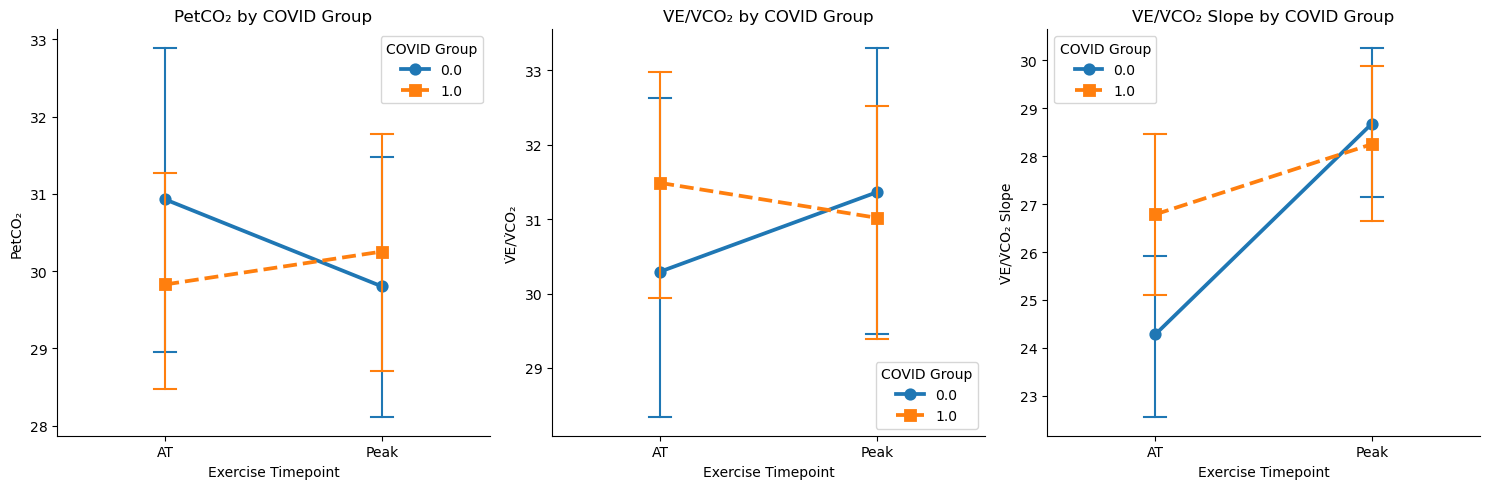

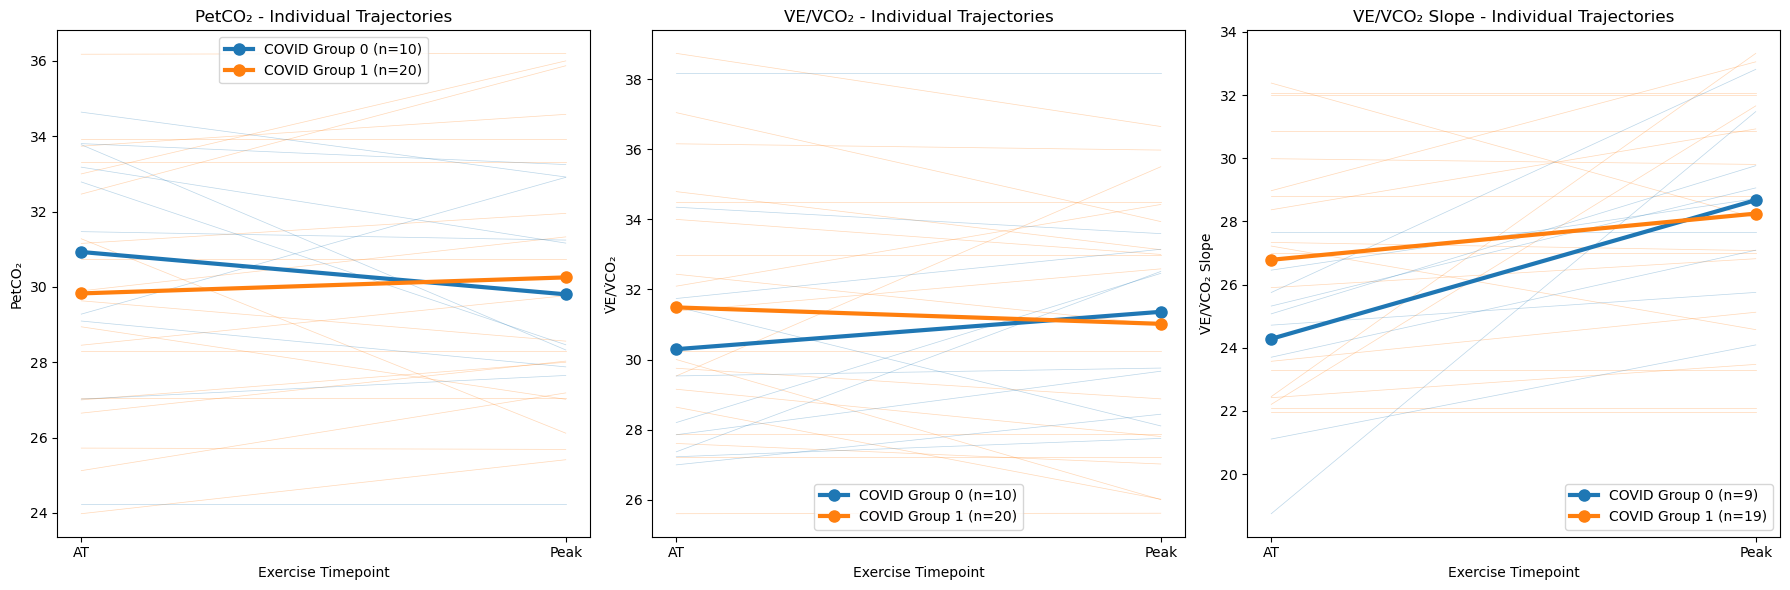

=== Summary Statistics ===

--- PetCO₂ ---
COVID Group 0:
  AT:   30.93 ± 3.42 (n=10)
  Peak: 29.80 ± 2.95 (n=10)
COVID Group 1:
  AT:   29.83 ± 3.33 (n=20)
  Peak: 30.25 ± 3.66 (n=20)

--- V̇E/V̇CO₂ ---
COVID Group 0:
  AT:   30.30 ± 3.69 (n=10)
  Peak: 31.36 ± 3.25 (n=10)
COVID Group 1:
  AT:   31.49 ± 3.56 (n=20)
  Peak: 31.02 ± 3.69 (n=20)

--- V̇E/V̇CO₂ Slope ---
COVID Group 0:
  AT:   24.28 ± 2.77 (n=9)
  Peak: 28.67 ± 2.63 (n=10)
COVID Group 1:
  AT:   26.78 ± 3.75 (n=19)
  Peak: 28.25 ± 3.84 (n=20)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define your variables
cpet_variables = [
    'cpet_petco2_at_vslope', 'cpet_petco2_peak',
    'cpet_vevco2_at_vslope', 'cpet_vevco2_peak', 
    'cpet_vevco2slope_at_vslope', 'cpet_vevco2slope_peak'
]

# Create a mapping for better variable names
variable_names = {
    'cpet_petco2_at_vslope': 'PetCO₂ at VT',
    'cpet_petco2_peak': 'PetCO₂ at Peak',
    'cpet_vevco2_at_vslope': 'V̇E/V̇CO₂ at VT', 
    'cpet_vevco2_peak': 'V̇E/V̇CO₂ at Peak',
    'cpet_vevco2slope_at_vslope': 'V̇E/V̇CO₂ Slope at VT',
    'cpet_vevco2slope_peak': 'V̇E/V̇CO₂ Slope at Peak'
}

# Reshape data for plotting
plot_data = []

for var in cpet_variables:
    # Skip missing data
    valid_data = df[['covid_group', var]].dropna()
    
    for idx, row in valid_data.iterrows():
        plot_data.append({
            'Subject_ID': idx,  # Use the original index as subject identifier
            'COVID_Group': row['covid_group'],
            'Variable': variable_names[var],
            'Value': row[var],
            'Timepoint': 'AT' if 'at_vslope' in var else 'Peak',
            'Parameter': 'PetCO₂' if 'petco2' in var else 'V̇E/V̇CO₂' if 'vevco2_' in var else 'V̇E/V̇CO₂ Slope'
        })

plot_df = pd.DataFrame(plot_data)

# Create separate plots for each parameter
parameters = ['PetCO₂', 'V̇E/V̇CO₂', 'V̇E/V̇CO₂ Slope']
colors = ['#1f77b4', '#ff7f0e']  # Colors for COVID groups

# First, create simple point plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, param in enumerate(parameters):
    # Filter data for this parameter
    param_data = plot_df[plot_df['Parameter'] == param]
    
    # Create the plot
    sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',
                  palette=colors, markers=['o', 's'], linestyles=['-', '--'],
                  capsize=0.1, errwidth=1.5, ax=axes[i])
    
    axes[i].set_title(f'{param} by COVID Group')
    axes[i].set_ylabel(param)
    axes[i].set_xlabel('Exercise Timepoint')
    axes[i].legend(title='COVID Group')
    
    # Improve appearance
    sns.despine()

plt.tight_layout()
plt.show()

# CORRECTED spaghetti plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, param in enumerate(parameters):
    # Filter data for this parameter
    param_data = plot_df[plot_df['Parameter'] == param]
    
    # Pivot data correctly - use Subject_ID as the index
    pivot_data = param_data.pivot_table(
        index=['Subject_ID', 'COVID_Group'],  # Use Subject_ID instead of plot_df.index
        columns='Timepoint', 
        values='Value'
    ).reset_index()
    
    # Create spaghetti plot
    for covid_group in pivot_data['COVID_Group'].unique():
        group_data = pivot_data[pivot_data['COVID_Group'] == covid_group]
        
        # Plot individual lines
        for _, row in group_data.iterrows():
            if not pd.isna(row['AT']) and not pd.isna(row['Peak']):
                axes[i].plot(['AT', 'Peak'], [row['AT'], row['Peak']], 
                            color=colors[0] if covid_group == 0 else colors[1],
                            alpha=0.3, linewidth=0.5)
    
    # Plot group means with confidence intervals
    for j, covid_group in enumerate([0, 1]):
        group_data = param_data[param_data['COVID_Group'] == covid_group]
        
        # Calculate means and confidence intervals
        at_means = group_data[group_data['Timepoint'] == 'AT']['Value']
        peak_means = group_data[group_data['Timepoint'] == 'Peak']['Value']
        
        if len(at_means) > 0 and len(peak_means) > 0:
            at_mean = at_means.mean()
            peak_mean = peak_means.mean()
            
            axes[i].plot(['AT', 'Peak'], [at_mean, peak_mean],
                        color=colors[j], linewidth=3, marker='o', markersize=8,
                        label=f'COVID Group {covid_group} (n={len(at_means)})')
    
    axes[i].set_title(f'{param} - Individual Trajectories')
    axes[i].set_ylabel(param)
    axes[i].set_xlabel('Exercise Timepoint')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print some summary statistics
print("=== Summary Statistics ===")
for param in parameters:
    print(f"\n--- {param} ---")
    param_data = plot_df[plot_df['Parameter'] == param]
    
    for covid_group in [0, 1]:
        group_data = param_data[param_data['COVID_Group'] == covid_group]
        at_data = group_data[group_data['Timepoint'] == 'AT']['Value']
        peak_data = group_data[group_data['Timepoint'] == 'Peak']['Value']
        
        print(f"COVID Group {covid_group}:")
        print(f"  AT:   {at_data.mean():.2f} ± {at_data.std():.2f} (n={len(at_data)})")
        print(f"  Peak: {peak_data.mean():.2f} ± {peak_data.std():.2f} (n={len(peak_data)})")

## 6:49

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\2521626003.py:52: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',
C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\2521626003.py:52: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',
C:\Users\ZCooper\AppData\Local\Temp\ipykernel_35552\2521626003.py:52: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',


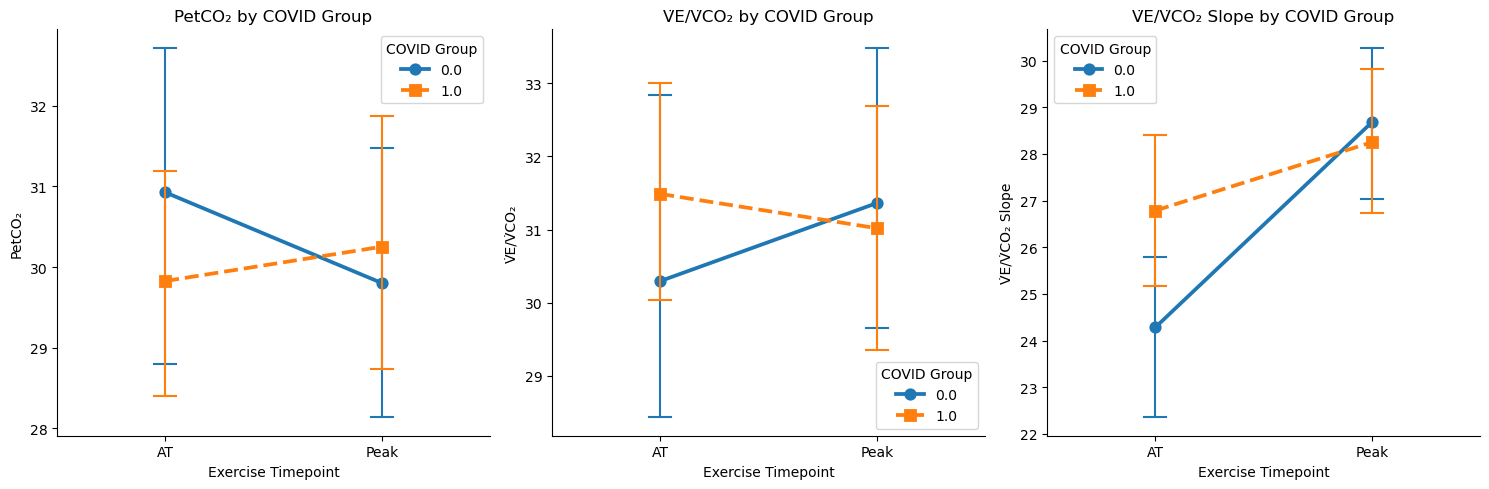

ValueError: Grouper and axis must be same length

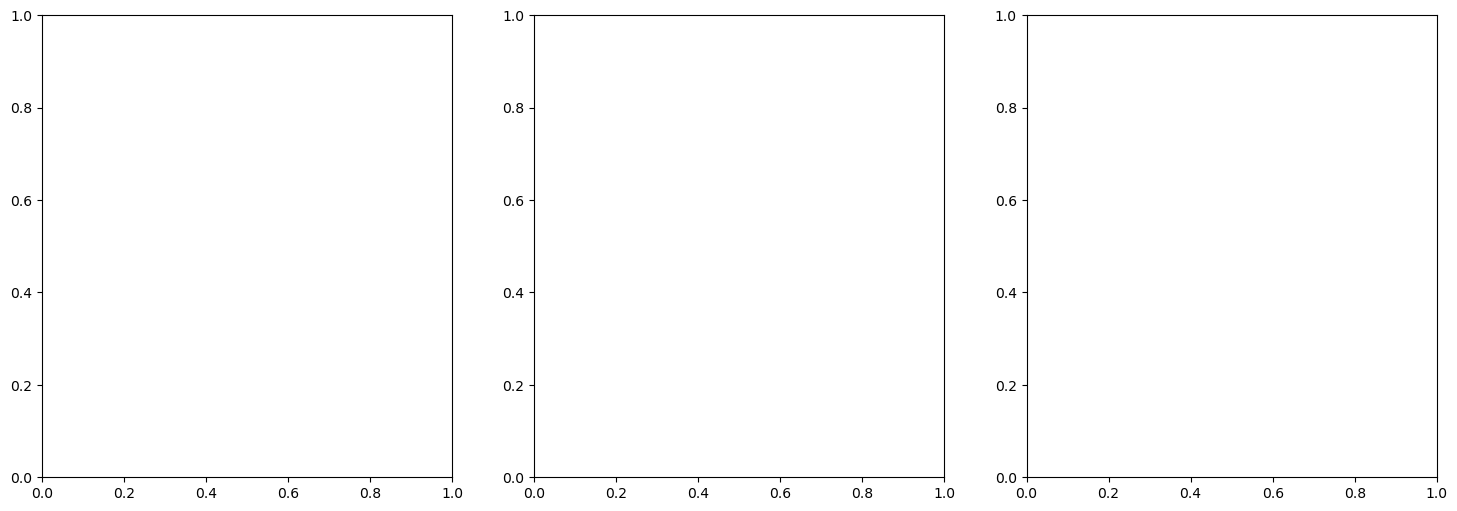

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define your variables
cpet_variables = [
    'cpet_petco2_at_vslope', 'cpet_petco2_peak',
    'cpet_vevco2_at_vslope', 'cpet_vevco2_peak', 
    'cpet_vevco2slope_at_vslope', 'cpet_vevco2slope_peak'
]

# Create a mapping for better variable names
variable_names = {
    'cpet_petco2_at_vslope': 'PetCO₂ at VT',
    'cpet_petco2_peak': 'PetCO₂ at Peak',
    'cpet_vevco2_at_vslope': 'V̇E/V̇CO₂ at VT', 
    'cpet_vevco2_peak': 'V̇E/V̇CO₂ at Peak',
    'cpet_vevco2slope_at_vslope': 'V̇E/V̇CO₂ Slope at VT',
    'cpet_vevco2slope_peak': 'V̇E/V̇CO₂ Slope at Peak'
}

# Reshape data for plotting
plot_data = []

for var in cpet_variables:
    # Skip missing data
    valid_data = df[['covid_group', var]].dropna()
    
    for _, row in valid_data.iterrows():
        plot_data.append({
            'COVID_Group': row['covid_group'],
            'Variable': variable_names[var],
            'Value': row[var],
            'Timepoint': 'AT' if 'at_vslope' in var else 'Peak',
            'Parameter': 'PetCO₂' if 'petco2' in var else 'V̇E/V̇CO₂' if 'vevco2_' in var else 'V̇E/V̇CO₂ Slope'
        })

plot_df = pd.DataFrame(plot_data)

# Create separate plots for each parameter
parameters = ['PetCO₂', 'V̇E/V̇CO₂', 'V̇E/V̇CO₂ Slope']
colors = ['#1f77b4', '#ff7f0e']  # Colors for COVID groups

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, param in enumerate(parameters):
    # Filter data for this parameter
    param_data = plot_df[plot_df['Parameter'] == param]
    
    # Create the plot
    sns.pointplot(data=param_data, x='Timepoint', y='Value', hue='COVID_Group',
                  palette=colors, markers=['o', 's'], linestyles=['-', '--'],
                  capsize=0.1, errwidth=1.5, ax=axes[i])
    
    axes[i].set_title(f'{param} by COVID Group')
    axes[i].set_ylabel(param)
    axes[i].set_xlabel('Exercise Timepoint')
    axes[i].legend(title='COVID Group')
    
    # Improve appearance
    sns.despine()

plt.tight_layout()
plt.show()

# Alternative: Individual line plots for each subject (spaghetti plots)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, param in enumerate(parameters):
    # Pivot data for line plots
    pivot_data = plot_df[plot_df['Parameter'] == param].pivot_table(
        index=[plot_df.index, 'COVID_Group'], 
        columns='Timepoint', 
        values='Value'
    ).reset_index()
    
    # Create spaghetti plot
    for covid_group in pivot_data['COVID_Group'].unique():
        group_data = pivot_data[pivot_data['COVID_Group'] == covid_group]
        
        # Plot individual lines
        for _, row in group_data.iterrows():
            axes[i].plot(['AT', 'Peak'], [row['AT'], row['Peak']], 
                        color=colors[0] if covid_group == 0 else colors[1],
                        alpha=0.3, linewidth=0.5)
    
    # Plot group means
    means = pivot_data.groupby('COVID_Group')[['AT', 'Peak']].mean()
    for j, (covid_group, mean_vals) in enumerate(means.iterrows()):
        axes[i].plot(['AT', 'Peak'], [mean_vals['AT'], mean_vals['Peak']],
                    color=colors[j], linewidth=3, marker='o', markersize=8,
                    label=f'COVID Group {covid_group}')
    
    axes[i].set_title(f'{param} - Individual Trajectories')
    axes[i].set_ylabel(param)
    axes[i].set_xlabel('Exercise Timepoint')
    axes[i].legend()

plt.tight_layout()
plt.show()

# End